In [69]:
# import packages

In [70]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Load ------------------------------------------
data = pd.read_csv("data/freeway_no1_north.csv")

# Data pre-process

In [72]:
#drop data
data.drop(['startkilo', 'endkilo', 'year', 'date', 'starttime', 'endtime'], axis=1, inplace=True)
# Since the values of feature "speed limit" are all the same, we drop the feature
data.drop(['speedlimit'], axis=1, inplace=True)
data.drop(['pavement', 'cement', 'remark', 'one'], axis=1, inplace=True)
print(data.columns)

Index(['crash', 'lane', 'minlane', 'addlane', 'totalwidth', 'lanewidth',
       'inshoulder', 'outshoulder', 'upslope', 'downslope', 'upslopelength',
       'downslopelength', 'maxupslope', 'maxdownslope', 'curvelength',
       'minradiuslength', 'minradius', 'continuouscurve', 'interchange',
       'tunnellength', 'tunnelin', 'tunnelout', 'shouderoallow', 'camera',
       'service', 'windspeed', 'rain', 'Var_windspeed', 'Var_rain', 'volume_S',
       'volume_L', 'volume_T', 'volume', 'PCU', 'Speed_volume', 'Speed_PCU',
       'heavy_rate', 'Var_volume', 'Var_PCU', 'Var_Speed_volume',
       'Var_Speed_PCU'],
      dtype='object')


In [73]:
#drop data
data.drop(['upslope', 'downslope', 'minradiuslength', 
           'Var_windspeed', 'Var_rain', 'volume', 'Var_volume', 
           'Var_PCU', 'Var_Speed_volume', 'Var_Speed_PCU'], axis=1, inplace=True)

In [74]:
print(data.dtypes)

crash                int64
lane                 int64
minlane              int64
addlane              int64
totalwidth         float64
lanewidth          float64
inshoulder         float64
outshoulder        float64
upslopelength        int64
downslopelength      int64
maxupslope         float64
maxdownslope       float64
curvelength          int64
minradius            int64
continuouscurve      int64
interchange          int64
tunnellength         int64
tunnelin             int64
tunnelout            int64
shouderoallow        int64
camera               int64
service              int64
windspeed           object
rain                object
volume_S           float64
volume_L           float64
volume_T           float64
PCU                float64
Speed_volume        object
Speed_PCU           object
heavy_rate          object
dtype: object


# replace crash values

### convert crash values to 1

In [75]:
# replace crash values
## convert crash values to 1
data.loc[data["crash"] >= 1, "crash"] = 1 

### data['rain'] has many non-numeric values: "&", try to fix them


In [76]:
# data['rain'] has many non-numeric values: "&", try to fix them
data['rain'] = pd.to_numeric(data['rain'], errors='coerce').fillna(0, downcast='float')
data['windspeed'] = pd.to_numeric(data['windspeed'], errors='coerce').fillna(0, downcast='float')
data['Speed_volume'] = pd.to_numeric(data['Speed_volume'], errors='coerce').fillna(0, downcast='float')
data['Speed_PCU'] = pd.to_numeric(data['Speed_PCU'], errors='coerce').fillna(0, downcast='float')
data['heavy_rate'] = pd.to_numeric(data['heavy_rate'], errors='coerce').fillna(0, downcast='float')

print(data.dtypes)

crash                int64
lane                 int64
minlane              int64
addlane              int64
totalwidth         float64
lanewidth          float64
inshoulder         float64
outshoulder        float64
upslopelength        int64
downslopelength      int64
maxupslope         float64
maxdownslope       float64
curvelength          int64
minradius            int64
continuouscurve      int64
interchange          int64
tunnellength         int64
tunnelin             int64
tunnelout            int64
shouderoallow        int64
camera               int64
service              int64
windspeed          float64
rain               float64
volume_S           float64
volume_L           float64
volume_T           float64
PCU                float64
Speed_volume       float64
Speed_PCU          float64
heavy_rate         float64
dtype: object


### Convert to categorial type..................

In [77]:
#Convert to categorial type..................
data["crash"] = data["crash"].astype("category")
data["minlane"] = data["minlane"].astype("category")
data["addlane"] = data["addlane"].astype("category")
data["continuouscurve"] = data["continuouscurve"].astype("category")
data["interchange"] = data["interchange"].astype("category")
data["tunnelin"] = data["tunnelin"].astype("category")
data["tunnelout"] = data["tunnelout"].astype("category")
data["shouderoallow"] = data["shouderoallow"].astype("category")
data["camera"] = data["camera"].astype("category")
data["service"] = data["service"].astype("category")

## Correlation heatmap 變數相關性確認

In [80]:
roadGeometryRelatedData = pd.concat([data['lane'], data['totalwidth'], data['lanewidth'],
                                     data['inshoulder'], data['outshoulder'], data['upslopelength'],
                                     data['downslopelength'], data['maxupslope'], data['maxdownslope'], 
                                     data['curvelength'], data['minradius'], data['tunnellength']], axis=1)
trafficFlowRelatedData = pd.concat([data['PCU'], data['Speed_PCU'], data['Speed_volume'], data['volume_S'],
                                   data['volume_T'], data['volume_L'], data['heavy_rate']], axis=1) 
weatherRelatedData = pd.concat([data['windspeed'], data['rain']], axis=1)

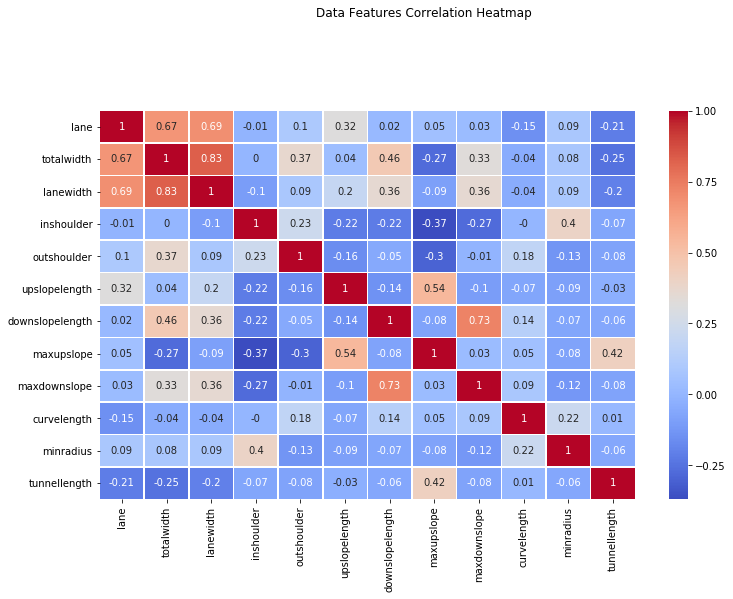

<Figure size 864x864 with 0 Axes>

In [81]:
# draw a heatmap -> roadGeometryRelatedData
corr = roadGeometryRelatedData.corr()
f, ax = plt.subplots(figsize=(12, 8))

plt.figure(figsize=(len(roadGeometryRelatedData.columns), len(roadGeometryRelatedData.columns)))
hm = sns.heatmap(round(corr,2),annot=True, ax=ax, cmap='coolwarm', linewidths=.5)
f.subplots_adjust(top=0.8)
ax.set_ylim(12, 0)
t= f.suptitle('Data Features Correlation Heatmap', fontsize=12)
plt.show() #畫出熱力圖

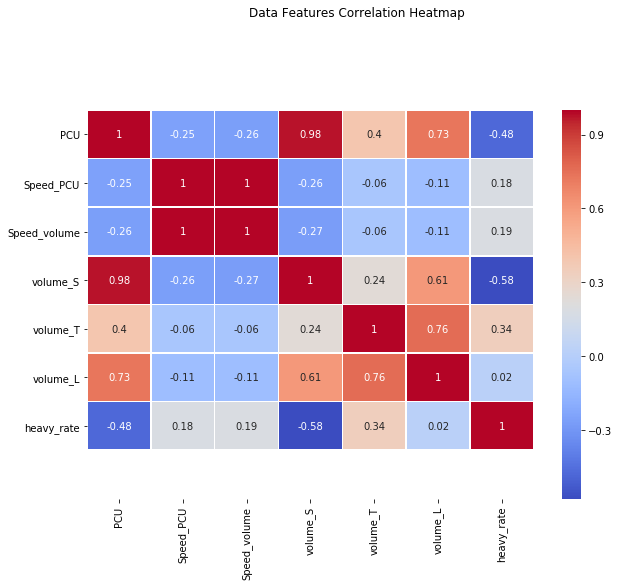

<Figure size 504x504 with 0 Axes>

In [90]:
# draw a heatmap -> trafficRelatedData
corr = trafficFlowRelatedData.corr()
f, ax = plt.subplots(figsize=(10, 8))

plt.figure(figsize=(len(trafficFlowRelatedData.columns), len(trafficFlowRelatedData.columns)))
hm = sns.heatmap(round(corr,2),annot=True, ax=ax, cmap='coolwarm', linewidths=.5)
f.subplots_adjust(top=0.8)
ax.set_ylim(8, 0)
t= f.suptitle('Data Features Correlation Heatmap', fontsize=12)
plt.show() #畫出熱力圖

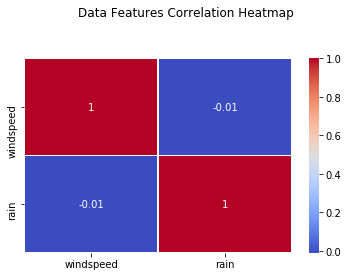

<Figure size 144x144 with 0 Axes>

In [94]:
# draw a heatmap -> trafficRelatedData
corr = weatherRelatedData.corr()
f, ax = plt.subplots(figsize=(6, 4))

plt.figure(figsize=(len(weatherRelatedData.columns), len(weatherRelatedData.columns)))
hm = sns.heatmap(round(corr,2),annot=True, ax=ax, cmap='coolwarm', linewidths=.5)
f.subplots_adjust(top=0.8)
ax.set_ylim(2, 0)
t= f.suptitle('Data Features Correlation Heatmap', fontsize=12)
plt.show() #畫出熱力圖

### by correlation analysis results, 
### we delete #data['Speed_volume'], data['volume_S'], data['volume_L'] and data['volume_T'] 

In [ ]:
data.drop(['Speed_volume', 'volume_S', 'volume_T', 'volume_L'], axis=1, inplace=True)

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
#data_sample = data.sample(n=2000)
data_Y = data['crash']
data_X = data.iloc[:, 1:]

In [ ]:
#convert categorical variable to dummy variable
## all categorial types will automatically convert to categorial variable 
data_X = pd.get_dummies(data_X, columns=None, drop_first=False)

In [ ]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=0)

In [ ]:
X_train

In [ ]:
model=sm.Logit(y_train,X_train,random_state=0)
result=model.fit()
print(result.summary())

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
#
y_pred=logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))